# Aerial View Right Whale Detection and Classification

In [1]:
import os
import imutils
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import figure
import tensorflow.compat.v1 as tf
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from skimage.color import rgb2gray
from skimage import io
from skimage.filters import threshold_otsu
from PIL import Image
from imutils.video import VideoStream
from imutils.video import FPS


#for tensorflow gpu
tf.disable_v2_behavior()
tf.enable_eager_execution()
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


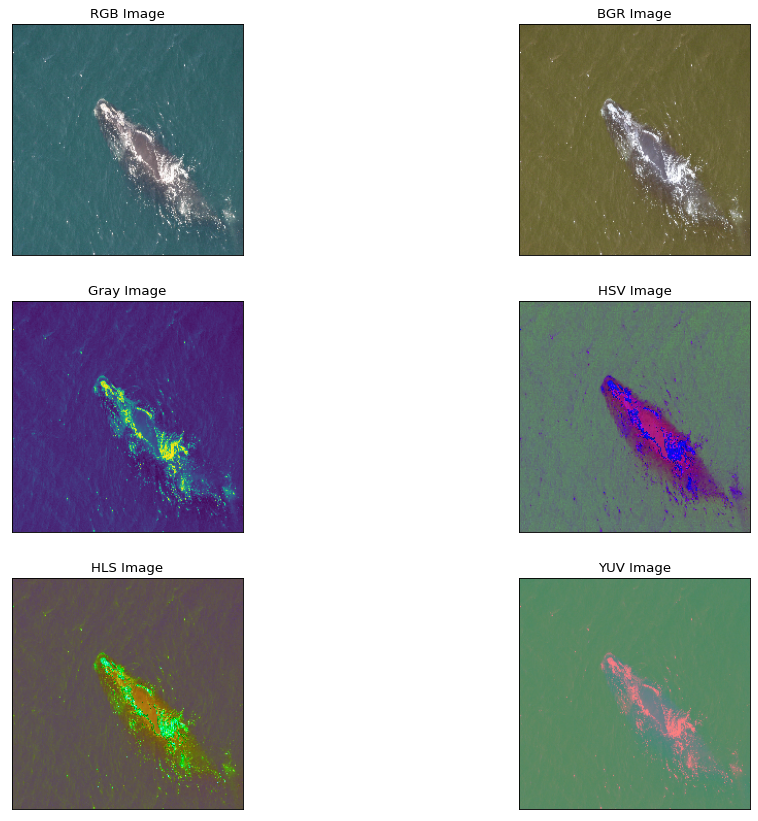

In [3]:
image = cv2.imread('/content/drive/MyDrive/dataset/trainSplit/w_0.jpg')
image = cv2.resize(image, (224,224))

rgbImage = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)#convert to RGB
rgbImage = cv2.rectangle(rgbImage, (927, 550), (1846+927, 1298+550),(255, 0, 0), 5)

bgrImage = cv2.rectangle(image, (927, 550), (1846+927, 1298+550),(255, 0, 0), 5)

grayImage = cv2.cvtColor(rgbImage, cv2.COLOR_RGB2GRAY) #convert to gray
grayImage = cv2.rectangle(grayImage, (927, 550), (1846+927, 1298+550),(225,0, 0), 5)

hsvImage = cv2.cvtColor(rgbImage, cv2.COLOR_RGB2HSV) #convert to hsv
hsvImage = cv2.rectangle(hsvImage, (927, 550), (1846+927, 1298+550),(225,0, 0), 5)

hlsImage = cv2.cvtColor(rgbImage, cv2.COLOR_RGB2HLS) #convert to hsl
hlsImage = cv2.rectangle(hlsImage, (927, 550), (1846+927, 1298+550),(225,0, 0), 5)

yuvImage = cv2.cvtColor(rgbImage, cv2.COLOR_RGB2YUV) #convert to hsl
yuvImage = cv2.rectangle(yuvImage, (927, 550), (1846+927, 1298+550),(225,0, 0), 5)

figure(figsize=(15, 13), dpi=80)
titles = ['RGB Image', 'BGR Image','Gray Image', 'HSV Image', 'HLS Image', 'YUV Image']
images = [rgbImage, bgrImage, grayImage, hsvImage, hlsImage, yuvImage]
for i in range(6):
    plt.subplot(3,2,i+1),plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

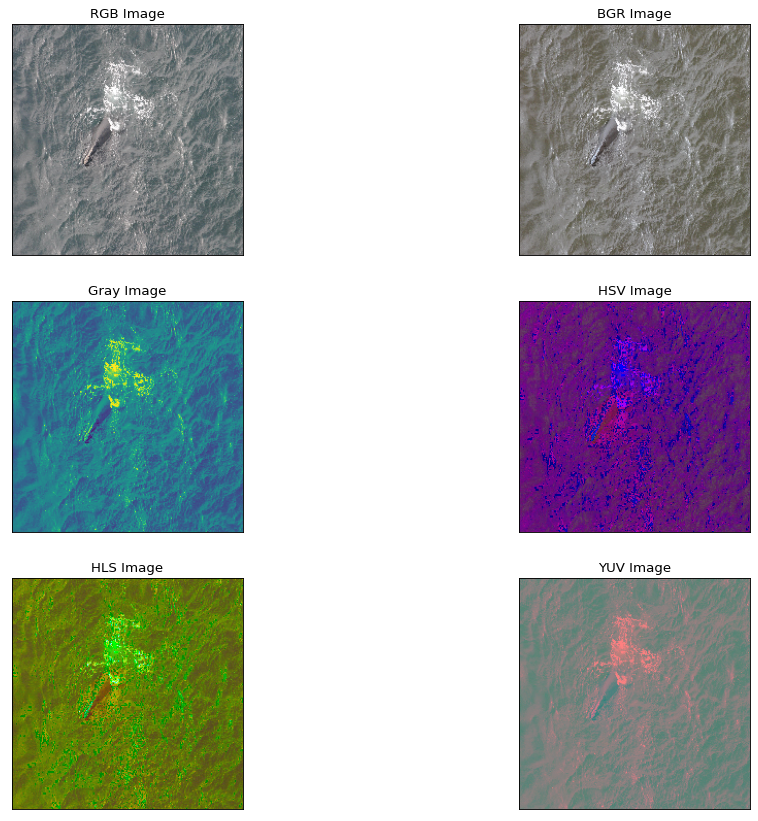

In [4]:
image = cv2.imread('/content/drive/MyDrive/dataset/trainSplit/w_3.jpg')
image = cv2.resize(image, (224,224))

rgbImage = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)#convert to RGB
rgbImage = cv2.rectangle(rgbImage, (885, 331), (972+885, 977+331),(255, 0, 0), 5)

bgrImage = cv2.rectangle(image, (885, 331), (972+885, 977+331),(255, 0, 0), 5)

grayImage = cv2.cvtColor(rgbImage, cv2.COLOR_RGB2GRAY) #convert to gray
grayImage = cv2.rectangle(grayImage, (885, 331), (972+885, 977+331),(225,0, 0), 5)

hsvImage = cv2.cvtColor(rgbImage, cv2.COLOR_RGB2HSV) #convert to hsv
hsvImage = cv2.rectangle(hsvImage, (885, 331), (972+885, 977+331),(225,0, 0), 5)

hlsImage = cv2.cvtColor(rgbImage, cv2.COLOR_RGB2HLS) #convert to hsl
hlsImage = cv2.rectangle(hlsImage, (885, 331), (972+885, 977+331),(225,0, 0), 5)

yuvImage = cv2.cvtColor(rgbImage, cv2.COLOR_RGB2YUV) #convert to hsl
yuvImage = cv2.rectangle(yuvImage, (885, 331), (972+885, 977+331),(225,0, 0), 5)

figure(figsize=(15, 13), dpi=80)
titles = ['RGB Image', 'BGR Image','Gray Image', 'HSV Image', 'HLS Image', 'YUV Image']
images = [rgbImage, bgrImage, grayImage, hsvImage, hlsImage, yuvImage]
for i in range(6):
    plt.subplot(3,2,i+1),plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

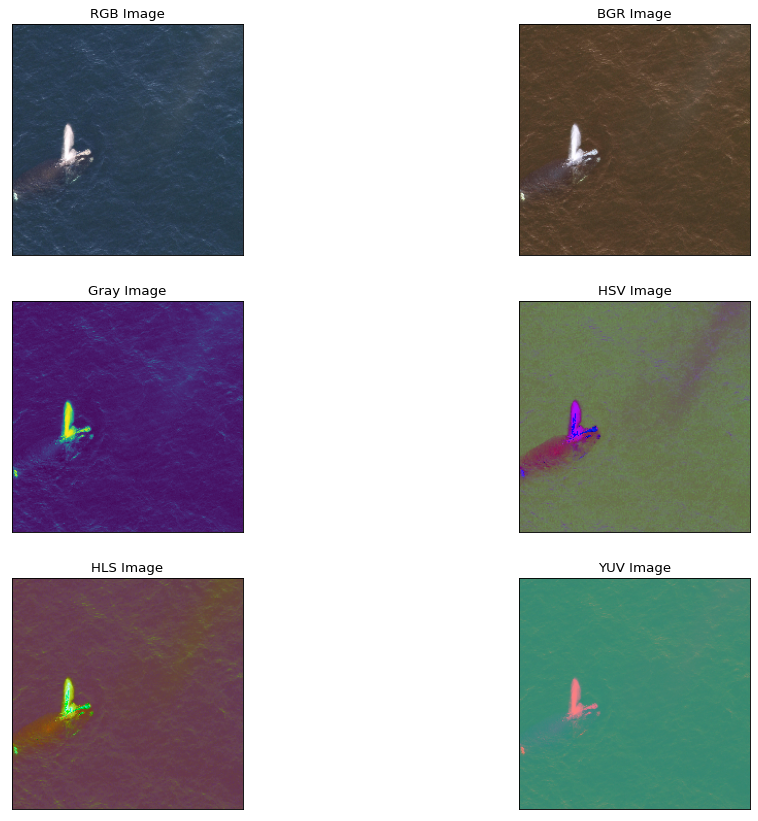

In [5]:
image = cv2.imread('/content/drive/MyDrive/dataset/trainSplit/w_10.jpg')
image = cv2.resize(image, (224,224))

rgbImage = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)#convert to RGB
rgbImage = cv2.rectangle(rgbImage, (0, 1314), (1827+0, 1275+1314),(255, 0, 0), 5)

bgrImage = cv2.rectangle(image, (0, 1314), (1827+0, 1275+1314),(255, 0, 0), 5)

grayImage = cv2.cvtColor(rgbImage, cv2.COLOR_RGB2GRAY) #convert to gray
grayImage = cv2.rectangle(grayImage, (0, 1314), (1827+0, 1275+1314),(225,0, 0), 5)

hsvImage = cv2.cvtColor(rgbImage, cv2.COLOR_RGB2HSV) #convert to hsv
hsvImage = cv2.rectangle(hsvImage, (0, 1314), (1827+0, 1275+1314),(225,0, 0), 5)

hlsImage = cv2.cvtColor(rgbImage, cv2.COLOR_RGB2HLS) #convert to hsl
hlsImage = cv2.rectangle(hlsImage, (0, 1314), (1827+0, 1275+1314),(225,0, 0), 5)

yuvImage = cv2.cvtColor(rgbImage, cv2.COLOR_RGB2YUV) #convert to hsl
yuvImage = cv2.rectangle(yuvImage, (0, 1314), (1827+0, 1275+1314),(225,0, 0), 5)

figure(figsize=(15, 13), dpi=80)
titles = ['RGB Image', 'BGR Image','Gray Image', 'HSV Image', 'HLS Image', 'YUV Image']
images = [rgbImage, bgrImage, grayImage, hsvImage, hlsImage, yuvImage]
for i in range(6):
    plt.subplot(3,2,i+1),plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [6]:
image = cv2.imread('/content/drive/MyDrive/dataset/trainSplit/w_201.jpg')
image = cv2.resize(image, (224,224))

rgbImage = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)#convert to RGB
rgbImage = cv2.rectangle(rgbImage, (559, 406), (1057+559, 858+406),(255, 0, 0), 5)

bgrImage = cv2.rectangle(image, (559, 406), (1057+559, 858+406),(255, 0, 0), 5)

grayImage = cv2.cvtColor(rgbImage, cv2.COLOR_RGB2GRAY) #convert to gray
grayImage = cv2.rectangle(grayImage, (559, 406), (1057+559, 858+406),(225,0, 0), 5)

hsvImage = cv2.cvtColor(rgbImage, cv2.COLOR_RGB2HSV) #convert to hsv
hsvImage = cv2.rectangle(hsvImage, (559, 406), (1057+559, 858+406),(225,0, 0), 5)

hlsImage = cv2.cvtColor(rgbImage, cv2.COLOR_RGB2HLS) #convert to hsl
hlsImage = cv2.rectangle(hlsImage, (559, 406), (1057+559, 858+406),(225,0, 0), 5)

yuvImage = cv2.cvtColor(rgbImage, cv2.COLOR_RGB2YUV) #convert to hsl
yuvImage = cv2.rectangle(yuvImage, (559, 406), (1057+559, 858+406),(225,0, 0), 5)

figure(figsize=(15, 13), dpi=80)
titles = ['RGB Image', 'BGR Image','Gray Image', 'HSV Image', 'HLS Image', 'YUV Image']
images = [rgbImage, bgrImage, grayImage, hsvImage, hlsImage, yuvImage]
for i in range(6):
    plt.subplot(3,2,i+1),plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (224, 224, 3) looks like an RGB image
  app.launch_new_instance()


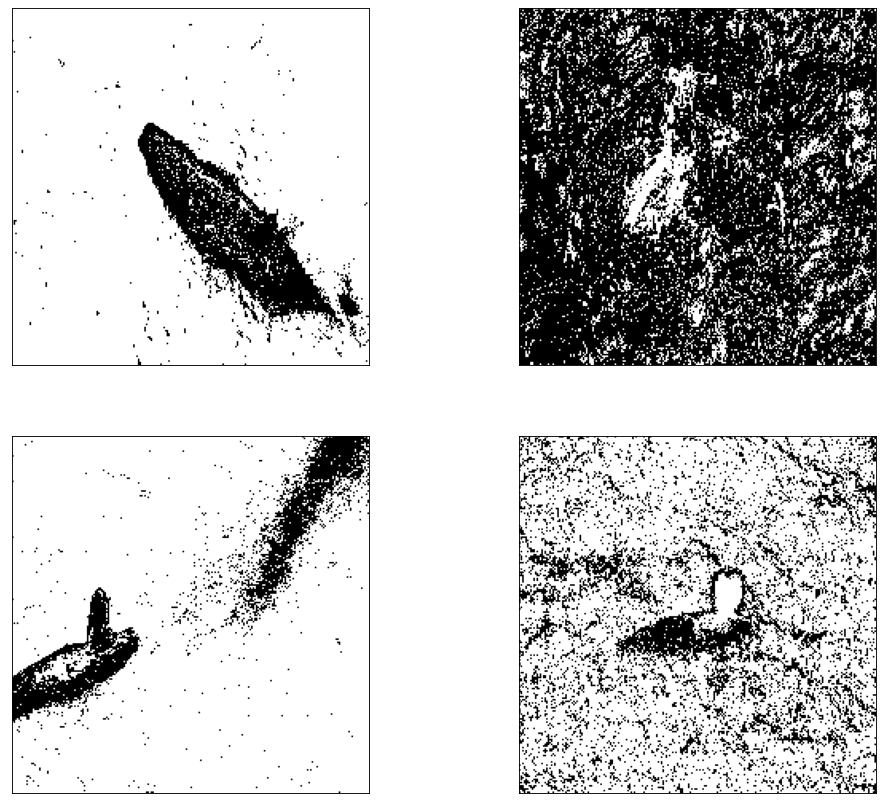

In [7]:
images = ['/content/drive/MyDrive/dataset/trainSplit/w_0.jpg', '/content/drive/MyDrive/dataset/trainSplit/w_3.jpg', '/content/drive/MyDrive/dataset/trainSplit/w_10.jpg', '/content/drive/MyDrive/dataset/trainSplit/w_201.jpg']
newImage = []

for i in images:
    image = cv2.imread(i)
    image = cv2.resize(image, (224,224))
    
    hsvImage = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    gray = cv2.cvtColor(hsvImage, cv2.COLOR_RGB2GRAY)
    
    grayImage = np.zeros_like(hsvImage)
    grayImage[:,:,0] = gray
    grayImage[:,:,1] = gray
    grayImage[:,:,2] = gray
    
    thresh = threshold_otsu(grayImage)
    bw = cv2.threshold(grayImage, thresh, 255, cv2.THRESH_BINARY)[1]
    
    newImage.append(bw)
    
figure(figsize=(15, 13), dpi=80)
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(newImage[i], cmap="gray")
    plt.xticks([]),plt.yticks([])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (224, 224, 3) looks like an RGB image
  if sys.path[0] == '':


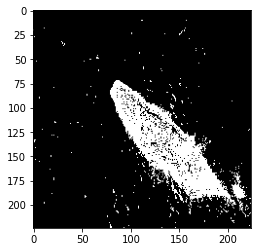

In [8]:
image = cv2.imread('/content/drive/MyDrive/dataset/trainSplit/w_0.jpg')
image = cv2.resize(image, (224,224))
    
hsvImage = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
gray = cv2.cvtColor(hsvImage, cv2.COLOR_RGB2GRAY)
    
grayImage = np.zeros_like(hsvImage)
grayImage[:,:,0] = gray
grayImage[:,:,1] = gray
grayImage[:,:,2] = gray
    
thresh = threshold_otsu(grayImage)
bw = cv2.threshold(grayImage, thresh, 255, cv2.THRESH_BINARY)[1]

pos = np.count_nonzero(bw)
neg = abs(np.size(bw) - pos)
if(pos>neg):
    bw = np.invert(bw)
    
plt.imshow(bw, cmap="gray")
plt.show()  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (224, 224, 3) looks like an RGB image
  if sys.path[0] == '':


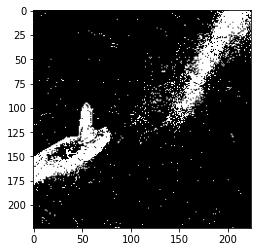

In [9]:
image = cv2.imread('/content/drive/MyDrive/dataset/trainSplit/w_10.jpg')
image = cv2.resize(image, (224,224))
    
hsvImage = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
gray = cv2.cvtColor(hsvImage, cv2.COLOR_RGB2GRAY)
    
grayImage = np.zeros_like(hsvImage)
grayImage[:,:,0] = gray
grayImage[:,:,1] = gray
grayImage[:,:,2] = gray
    
thresh = threshold_otsu(grayImage)
bw = cv2.threshold(grayImage, thresh, 255, cv2.THRESH_BINARY)[1]

pos = np.count_nonzero(bw)
neg = abs(np.size(bw) - pos)
if(pos>neg):
    bw = np.invert(bw)
    
plt.imshow(bw, cmap="gray")
plt.show()  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (224, 224, 3) looks like an RGB image
  if sys.path[0] == '':


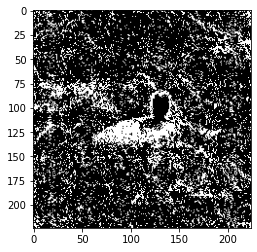

In [10]:
image = cv2.imread('/content/drive/MyDrive/dataset/trainSplit/w_201.jpg')
image = cv2.resize(image, (224,224))
    
hsvImage = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
gray = cv2.cvtColor(hsvImage, cv2.COLOR_RGB2GRAY)
    
grayImage = np.zeros_like(hsvImage)
grayImage[:,:,0] = gray
grayImage[:,:,1] = gray
grayImage[:,:,2] = gray
    
thresh = threshold_otsu(grayImage)
bw = cv2.threshold(grayImage, thresh, 255, cv2.THRESH_BINARY)[1]

pos = np.count_nonzero(bw)
neg = abs(np.size(bw) - pos)
if(pos>neg):
    bw = np.invert(bw)
    
plt.imshow(bw, cmap="gray")
plt.show()  

In [12]:
trainAnnots = open('/content/drive/MyDrive/dataset/trainSplit/train.csv').read().strip().split("\n")

trainLabels = []
trainTarget = []
trainImages=[]
trainLabel = []

for i in trainAnnots:
    print(i)
    (filename, label, x1,y1,x2,y2,w,h)= i.split(',')   
    imgPath = "/content/drive/MyDrive/dataset/trainSplit/"+filename
    image = cv2.imread(imgPath)
    image = cv2.resize(image, (224,224))
    
    hsvImage = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    gray = cv2.cvtColor(hsvImage, cv2.COLOR_RGB2GRAY)
    
    grayImage = np.zeros_like(hsvImage)
    grayImage[:,:,0] = gray
    grayImage[:,:,1] = gray
    grayImage[:,:,2] = gray
    
    thresh = threshold_otsu(grayImage)
    bw = cv2.threshold(grayImage, thresh, 255, cv2.THRESH_BINARY)[1]
    
    pos = np.count_nonzero(bw)
    neg = abs(np.size(bw) - pos)
    if(pos>neg):
        bw = np.invert(bw)
    
    x1 = float(x1)/int(w)
    y1 = float(y1)/int(h)
    x2 = float(x2)/int(w) + x1
    y2 = float(y2)/int(h) + y1

    trainImages.append(bw)
    trainTarget.append((x1,y1,x2,y2))
    trainLabels.append(label)

trainImages = np.array(trainImages, dtype="float32")/255
trainTarget = np.array(trainTarget, dtype='float32')
trainLabels = np.array(trainLabels)

lb = LabelBinarizer()
trainLabels = lb.fit_transform(trainLabels)
trainLabels = to_categorical(trainLabels, num_classes=2)

w_0.jpg,Right Whale,927,550,1846,1298,2773,1848
w_1.jpg,Right Whale,1272,787,1628,783,3072,2048
w_2.jpg,Right Whale,702,835,1779,865,3036,2024


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (224, 224, 3) looks like an RGB image


w_3.jpg,Right Whale,885,331,972,977,3072,2048
w_4.jpg,Right Whale,1133,535,567,969,2897,1931
w_5.jpg,Right Whale,806,0,1135,1218,3718,2478
w_6.jpg,Right Whale,0,630,2887,1410,5184,3456
w_6.jpg,Right Whale,3728,0,1456,684,5184,3456
w_7.jpg,Right Whale,364,276,1548,1007,3072,2048
w_8.jpg,Right Whale,1486,957,1586,1091,3072,2048
w_9.jpg,Right Whale,1059,1145,755,901,3069,2046
w_10.jpg,Right Whale,0,1314,1827,1275,4894,3263
w_11.jpg,Right Whale,1650,0,831,1699,3669,2446
w_12.jpg,Right Whale,1395,747,1244,617,3114,2076
w_13.jpg,Right Whale,109,599,1365,676,2406,1604
w_74.jpg,Right Whale,1280,0,1184,1289,3072,2048
w_75.jpg,Right Whale,1271,480,965,690,3072,2048
w_76.jpg,Right Whale,894,613,1825,1478,3144,2096
w_77.jpg,Right Whale,648,239,935,1174,2921,1947
w_78.jpg,Right Whale,1240,1081,1082,427,3334,2222
w_79.jpg,Right Whale,986,265,888,1040,3013,2009
w_80.jpg,Right Whale,390,0,2088,1478,3448,2299
w_81.jpg,Right Whale,1147,759,1221,1289,3072,2048
w_82.jpg,Right Whale,1049,923,1976,824,3024,

In [13]:
testAnnots = open('/content/drive/MyDrive/dataset/testSplit/test.csv').read().strip().split("\n")

testLabels = []
testTarget = []
testLabel = []
testImages=[]

for i in testAnnots:
    print(i)
    (filename, label, x1,y1,x2,y2,w,h)= i.split(',')  
    imgPath = "/content/drive/MyDrive/dataset/testSplit/"+filename
    image = cv2.imread(imgPath)
    image = cv2.resize(image, (224,224))
    
    hsvImage = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    gray = cv2.cvtColor(hsvImage, cv2.COLOR_RGB2GRAY)
    
    grayImage = np.zeros_like(hsvImage)
    grayImage[:,:,0] = gray
    grayImage[:,:,1] = gray
    grayImage[:,:,2] = gray
    
    thresh = threshold_otsu(grayImage)
    bw = cv2.threshold(grayImage, thresh, 255, cv2.THRESH_BINARY)[1]
    
    pos = np.count_nonzero(bw)
    neg = abs(np.size(bw) - pos)
    if(pos>neg):
        bw = np.invert(bw)
        
    x1 = float(x1)/int(w)
    y1 = float(y1)/int(h)
    x2 = float(x2)/int(w) + x1
    y2 = float(y2)/int(h) + y1

    testImages.append(bw)
    testTarget.append((x1,y1,x2,y2))
    testLabels.append(label)

testImages = np.array(testImages, dtype="float32")/255
testTarget = np.array(testTarget, dtype="float32")
testLabels = np.array(testLabels)

lb = LabelBinarizer()
testLabels = lb.fit_transform(testLabels)
testLabels = to_categorical(testLabels, num_classes=2)

w_14.jpg,Right Whale,1256,1019,1120,836,3238,2159


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (224, 224, 3) looks like an RGB image


w_15.jpg,Right Whale,1713,924,2390,2356,5184,3456
w_16.jpg,Right Whale,778,785,678,1263,3072,2048
w_17.jpg,Right Whale,1486,605,520,947,3423,2282
w_18.jpg,Right Whale,1197,790,1110,1258,3072,2048
w_19.jpg,Right Whale,1100,305,1753,1107,3012,2008
w_20.jpg,Right Whale,959,6,1444,2306,4634,3089
w_21.jpg,Right Whale,50,475,1531,880,3072,2048
w_22.jpg,Right Whale,559,406,1057,858,3072,2048
w_23.jpg,Right Whale,336,1032,1412,864,2999,2000
w_24.jpg,Right Whale,789,945,1404,800,3210,2140
w_25.jpg,Right Whale,0,422,1540,728,2564,1710
w_26.jpg,Right Whale,1014,62,854,1177,2989,1993
w_27.jpg,Right Whale,0,278,2112,1105,3535,2357
w_28.jpg,Right Whale,1067,717,1721,494,3072,2048
w_29.jpg,Right Whale,920,807,1142,1497,3456,2304
w_30.jpg,Right Whale,893,156,1740,1898,5117,3411
w_31.jpg,Right Whale,992,301,607,871,2710,1807
w_32.jpg,Right Whale,1297,251,1351,541,3072,2048
w_33.jpg,Right Whale,160,764,2207,589,2890,1927
w_34.jpg,Right Whale,2474,1025,2837,1283,5452,3635
w_35.jpg,Right Whale,1012,593,83

In [14]:
conv_model = VGG16(include_top=False,weights='imagenet',input_shape=(224,224,3))
conv_model.trainable = True
flatten = conv_model.output
flatten = layers.Flatten()(flatten)

58892288/58889256 [==============================] - 1s 0us/step


In [16]:
#regression layers
regressor = layers.Dense(256, activation='relu')(flatten)
regressor = layers.Dense(64, activation='relu')(regressor)
regressor = layers.Dense(64, activation='relu')(regressor)
regressor = layers.Dense(32, activation='relu')(regressor)
regressor = layers.Dense(32, activation='relu')(regressor)
regressor = layers.Dense(4,  activation='sigmoid',name='regressor')(regressor)


#classification layers
classifier = layers.Dense(256, activation='relu')(flatten)
classifier = layers.Dropout(0.5)(classifier)
classifier = layers.Dense(128, activation='relu')(classifier)
classifier = layers.Dense(128, activation='relu')(classifier)
classifier = layers.Dropout(0.5)(classifier)
classifier = layers.Dense(64, activation='relu')(classifier)
classifier = layers.Dense(64, activation='relu')(classifier)
classifier = layers.Dropout(0.5)(classifier)
classifier = layers.Dense(32, activation='relu')(classifier)
classifier = layers.Dense(32, activation='relu')(classifier)
classifier = layers.Dropout(0.5)(classifier)
classifier = layers.Dense(16, activation='relu')(classifier)
classifier = layers.Dense(16, activation='relu')(classifier)
classifier = layers.Dropout(0.5)(classifier)
classifier = layers.Dense(2, activation='softmax',name='classifier')(classifier)

In [17]:
model = Model(inputs = conv_model.input, outputs = (regressor,classifier))

In [18]:
losses = {'regressor':'mse', 'classifier':'categorical_crossentropy'}
l_weights = {'regressor':1.0,'classifier':1.0}

train_target = {'regressor':trainTarget, 'classifier': trainLabels}
test_target = {'regressor':testTarget, 'classifier':testLabels}

In [23]:
class regCallback(keras.callbacks.Callback):
    def on_epoch_end(self, batch, logs=None):
        if(logs.get('regressor_accuracy')>=0.85 and logs.get('val_regressor_accuracy')>=0.85):
            self.model.stop_training = True
callbacks = regCallback()


In [24]:
model.compile(loss=losses, optimizer=Adam(lr=1e-5), metrics=["accuracy"], loss_weights=l_weights)

history = model.fit(trainImages, train_target, validation_data=(testImages, test_target), callbacks=[callbacks], shuffle=True, epochs = 100,verbose=2, batch_size=32)

Epoch 1/100
88/88 - 44s - loss: 0.7173 - regressor_loss: 0.0423 - classifier_loss: 0.6750 - regressor_accuracy: 0.4276 - classifier_accuracy: 0.5607 - val_loss: 0.6612 - val_regressor_loss: 0.0321 - val_classifier_loss: 0.6291 - val_regressor_accuracy: 0.4819 - val_classifier_accuracy: 0.6389
Epoch 2/100
88/88 - 41s - loss: 0.6667 - regressor_loss: 0.0252 - classifier_loss: 0.6415 - regressor_accuracy: 0.4899 - classifier_accuracy: 0.5688 - val_loss: 0.5930 - val_regressor_loss: 0.0221 - val_classifier_loss: 0.5710 - val_regressor_accuracy: 0.4980 - val_classifier_accuracy: 0.6430
Epoch 3/100
88/88 - 41s - loss: 0.6556 - regressor_loss: 0.0184 - classifier_loss: 0.6372 - regressor_accuracy: 0.5076 - classifier_accuracy: 0.5720 - val_loss: 0.6013 - val_regressor_loss: 0.0166 - val_classifier_loss: 0.5847 - val_regressor_accuracy: 0.5208 - val_classifier_accuracy: 0.6550
Epoch 4/100
88/88 - 41s - loss: 0.6261 - regressor_loss: 0.0162 - classifier_loss: 0.6099 - regressor_accuracy: 0.5141

In [25]:
print ('Regressor Train loss:', round(history.history['regressor_loss'][-1], 3))
print ('Regressor Test loss:', round(history.history['val_regressor_loss'][-1], 3))
plt.plot(history.history['regressor_loss'])
plt.plot(history.history['val_regressor_loss'])
plt.title('Regression Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.plot()

Regressor Train loss: 0.003
Regressor Test loss: 0.013


[]

Regressor Train Acc: 0.588
Regressor Test Acc: 0.627


[]

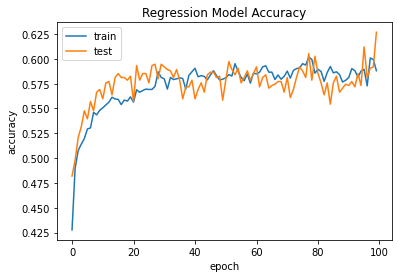

In [28]:
print ('Regressor Train Acc:', round(history.history['regressor_accuracy'][-1], 3))
print ('Regressor Test Acc:', round(history.history['val_regressor_accuracy'][-1], 3))
plt.plot(history.history['regressor_accuracy'])
plt.plot(history.history['val_regressor_accuracy'])
plt.title('Regression Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.plot()

Classification Train loss: 0.267
Classification Test loss: 0.314


[]

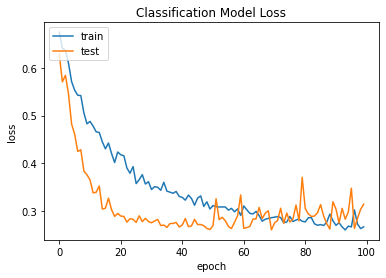

In [29]:
print ('Classification Train loss:', round(history.history['classifier_loss'][-1], 3))
print ('Classification Test loss:', round(history.history['val_classifier_loss'][-1], 3))
plt.plot(history.history['classifier_loss'])
plt.plot(history.history['val_classifier_loss'])
plt.title('Classification Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.plot()

Classification Train Acc: 0.972
Classification Test Acc: 0.965


[]

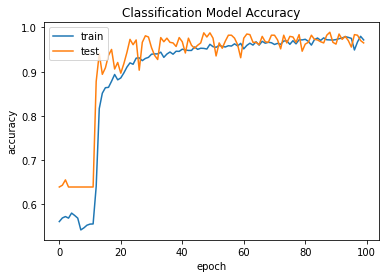

In [30]:
print ('Classification Train Acc:', round(history.history['classifier_accuracy'][-1], 3))
print ('Classification Test Acc:', round(history.history['val_classifier_accuracy'][-1], 3))
plt.plot(history.history['classifier_accuracy'])
plt.plot(history.history['val_classifier_accuracy'])
plt.title('Classification Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.plot()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (224, 224, 3) looks like an RGB image
  del sys.path[0]


919 658 2712 1504


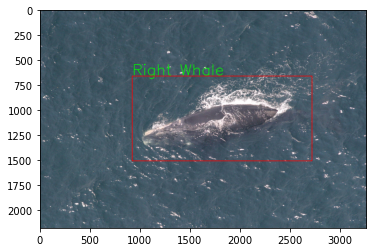

In [32]:
testImage1 = '/content/drive/MyDrive/dataset/test/test1.jpg'

image = cv2.imread(testImage1)
image = cv2.resize(image, (224,224))
hsvImage = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
gray = cv2.cvtColor(hsvImage, cv2.COLOR_RGB2GRAY)

grayImage = np.zeros_like(hsvImage)
grayImage[:,:,0] = gray
grayImage[:,:,1] = gray
grayImage[:,:,2] = gray

thresh = threshold_otsu(grayImage)
bw = cv2.threshold(grayImage, thresh, 255, cv2.THRESH_BINARY)[1]

pos = np.count_nonzero(bw)
neg = abs(np.size(bw) - pos)
if(pos>neg):
    bw = np.invert(bw)
    
bwImage = np.array(bw, dtype="uint8")/255
bwImage = np.expand_dims(bwImage, axis=0)

(boxPreds, labelPreds) = model.predict(bwImage)

(startX, startY, endX, endY) = boxPreds[0]
i = np.argmax(labelPreds, axis=1)
label = lb.classes_[i][0]

image= cv2.imread(testImage1)
image = imutils.resize(image)
(h, w) = image.shape[:2]

if(label=='Right Whale'):
    startX = int(startX * w)
    startY = int(startY * h)
    endX = int(endX * w) 
    endY = int(endY * h) 
    print(startX, startY, endX, endY)
    y = startY - 10 if startY - 10 > 10 else startY + 150
    cv2.putText(image, label, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 5, (0, 255, 0), 5)
    test = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    res = cv2.rectangle(test, (startX, startY), (endX, endY),(255, 0, 0), 5)

else:
    cv2.putText(image, label, (30, 100), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 5)
    test2 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    res = test2

plt.imshow(res)
plt.grid(False)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (224, 224, 3) looks like an RGB image
  del sys.path[0]


1110 48 2433 1445


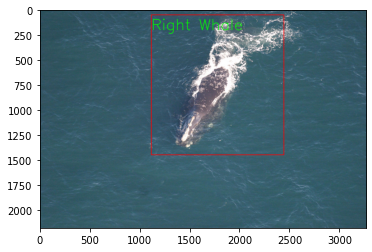

In [42]:
testImage2 = '/content/drive/MyDrive/dataset/test/test2.jpg'

image = cv2.imread(testImage2)
image = cv2.resize(image, (224,224))
hsvImage = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
gray = cv2.cvtColor(hsvImage, cv2.COLOR_RGB2GRAY)

grayImage = np.zeros_like(hsvImage)
grayImage[:,:,0] = gray
grayImage[:,:,1] = gray
grayImage[:,:,2] = gray

thresh = threshold_otsu(grayImage)
bw = cv2.threshold(grayImage, thresh, 255, cv2.THRESH_BINARY)[1]

pos = np.count_nonzero(bw)
neg = abs(np.size(bw) - pos)
if(pos>neg):
    bw = np.invert(bw)
    
bwImage = np.array(bw, dtype="uint8")/255
bwImage = np.expand_dims(bwImage, axis=0)

(boxPreds, labelPreds) = model.predict(bwImage)

(startX, startY, endX, endY) = boxPreds[0]
i = np.argmax(labelPreds, axis=1)
label = lb.classes_[i][0]

image= cv2.imread(testImage2)
image = imutils.resize(image)
(h, w) = image.shape[:2]

if(label=='Right Whale'):
    startX = int(startX * w)
    startY = int(startY * h)
    endX = int(endX * w) 
    endY = int(endY * h) 
    print(startX, startY, endX, endY)
    y = startY - 10 if startY - 10 > 40 else startY + 150
    cv2.putText(image, label, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 5, (0, 255, 0), 5)
    test = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    res = cv2.rectangle(test, (startX, startY), (endX, endY),(255, 0, 0), 5)

else:
    cv2.putText(image, label, (30, 100), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 5)
    test2 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    res = test2

plt.imshow(res)
plt.grid(False)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (224, 224, 3) looks like an RGB image
  del sys.path[0]


1315 1003 2758 2030


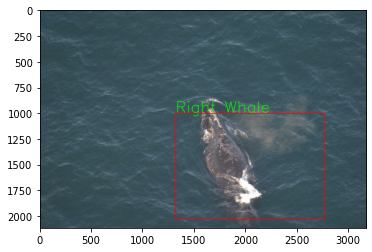

In [43]:
testImage3 = '/content/drive/MyDrive/dataset/test/test3.jpg'

image = cv2.imread(testImage3)
image = cv2.resize(image, (224,224))
hsvImage = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
gray = cv2.cvtColor(hsvImage, cv2.COLOR_RGB2GRAY)

grayImage = np.zeros_like(hsvImage)
grayImage[:,:,0] = gray
grayImage[:,:,1] = gray
grayImage[:,:,2] = gray

thresh = threshold_otsu(grayImage)
bw = cv2.threshold(grayImage, thresh, 255, cv2.THRESH_BINARY)[1]

pos = np.count_nonzero(bw)
neg = abs(np.size(bw) - pos)
if(pos>neg):
    bw = np.invert(bw)
    
bwImage = np.array(bw, dtype="uint8")/255
bwImage = np.expand_dims(bwImage, axis=0)

(boxPreds, labelPreds) = model.predict(bwImage)

(startX, startY, endX, endY) = boxPreds[0]
i = np.argmax(labelPreds, axis=1)
label = lb.classes_[i][0]

image= cv2.imread(testImage3)
image = imutils.resize(image)
(h, w) = image.shape[:2]

if(label=='Right Whale'):
    startX = int(startX * w)
    startY = int(startY * h)
    endX = int(endX * w) 
    endY = int(endY * h) 
    print(startX, startY, endX, endY)
    y = startY - 10 if startY - 10 > 10 else startY + 150
    cv2.putText(image, label, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 5, (0, 255, 0), 5)
    test = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    res = cv2.rectangle(test, (startX, startY), (endX, endY),(255, 0, 0), 5)

else:
    cv2.putText(image, label, (30, 100), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 5)
    test2 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    res = test2

plt.imshow(res)
plt.grid(False)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (224, 224, 3) looks like an RGB image
  del sys.path[0]


1144 857 4513 2415


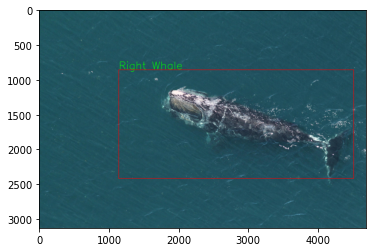

In [45]:
testImage4 = '/content/drive/MyDrive/dataset/test/test4.jpg'

image = cv2.imread(testImage4)
image = cv2.resize(image, (224,224))
hsvImage = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
gray = cv2.cvtColor(hsvImage, cv2.COLOR_RGB2GRAY)

grayImage = np.zeros_like(hsvImage)
grayImage[:,:,0] = gray
grayImage[:,:,1] = gray
grayImage[:,:,2] = gray

thresh = threshold_otsu(grayImage)
bw = cv2.threshold(grayImage, thresh, 255, cv2.THRESH_BINARY)[1]

pos = np.count_nonzero(bw)
neg = abs(np.size(bw) - pos)
if(pos>neg):
    bw = np.invert(bw)
    
bwImage = np.array(bw, dtype="uint8")/255
bwImage = np.expand_dims(bwImage, axis=0)

(boxPreds, labelPreds) = model.predict(bwImage)

(startX, startY, endX, endY) = boxPreds[0]
i = np.argmax(labelPreds, axis=1)
label = lb.classes_[i][0]

image= cv2.imread(testImage4)
image = imutils.resize(image)
(h, w) = image.shape[:2]

if(label=='Right Whale'):
    startX = int(startX * w)
    startY = int(startY * h)
    endX = int(endX * w) 
    endY = int(endY * h) 
    print(startX, startY, endX, endY)
    y = startY - 10 if startY - 10 > 10 else startY + 150
    cv2.putText(image, label, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 5, (0, 255, 0), 5)
    test = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    res = cv2.rectangle(test, (startX, startY), (endX, endY),(255, 0, 0), 5)

else:
    cv2.putText(image, label, (30, 100), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 5)
    test2 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    res = test2

plt.imshow(res)
plt.grid(False)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (224, 224, 3) looks like an RGB image
  del sys.path[0]


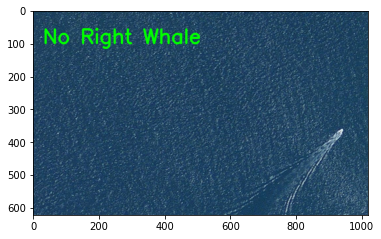

In [46]:
testImage5 = '/content/drive/MyDrive/dataset/test/test5.png'

image = cv2.imread(testImage5)
image = cv2.resize(image, (224,224))
hsvImage = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
gray = cv2.cvtColor(hsvImage, cv2.COLOR_RGB2GRAY)

grayImage = np.zeros_like(hsvImage)
grayImage[:,:,0] = gray
grayImage[:,:,1] = gray
grayImage[:,:,2] = gray

thresh = threshold_otsu(grayImage)
bw = cv2.threshold(grayImage, thresh, 255, cv2.THRESH_BINARY)[1]

pos = np.count_nonzero(bw)
neg = abs(np.size(bw) - pos)
if(pos>neg):
    bw = np.invert(bw)
    
bwImage = np.array(bw, dtype="uint8")/255
bwImage = np.expand_dims(bwImage, axis=0)

(boxPreds, labelPreds) = model.predict(bwImage)

(startX, startY, endX, endY) = boxPreds[0]
i = np.argmax(labelPreds, axis=1)
label = lb.classes_[i][0]

image= cv2.imread(testImage5)
image = imutils.resize(image)
(h, w) = image.shape[:2]

if(label=='Right Whale'):
    startX = int(startX * w)
    startY = int(startY * h)
    endX = int(endX * w) 
    endY = int(endY * h) 
    print(startX, startY, endX, endY)
    y = startY - 10 if startY - 10 > 10 else startY + 150
    cv2.putText(image, label, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 5, (0, 255, 0), 5)
    test = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    res = cv2.rectangle(test, (startX, startY), (endX, endY),(255, 0, 0), 5)

else:
    cv2.putText(image, label, (30, 100), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 5)
    test2 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    res = test2

plt.imshow(res)
plt.grid(False)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (224, 224, 3) looks like an RGB image
  del sys.path[0]


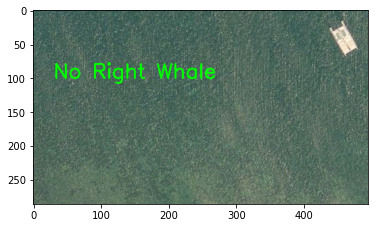

In [47]:
testImage6 = '/content/drive/MyDrive/dataset/test/test6.png'

image = cv2.imread(testImage6)
image = cv2.resize(image, (224,224))
hsvImage = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
gray = cv2.cvtColor(hsvImage, cv2.COLOR_RGB2GRAY)

grayImage = np.zeros_like(hsvImage)
grayImage[:,:,0] = gray
grayImage[:,:,1] = gray
grayImage[:,:,2] = gray

thresh = threshold_otsu(grayImage)
bw = cv2.threshold(grayImage, thresh, 255, cv2.THRESH_BINARY)[1]

pos = np.count_nonzero(bw)
neg = abs(np.size(bw) - pos)
if(pos>neg):
    bw = np.invert(bw)
    
bwImage = np.array(bw, dtype="uint8")/255
bwImage = np.expand_dims(bwImage, axis=0)

(boxPreds, labelPreds) = model.predict(bwImage)

(startX, startY, endX, endY) = boxPreds[0]
i = np.argmax(labelPreds, axis=1)
label = lb.classes_[i][0]

image= cv2.imread(testImage6)
image = imutils.resize(image)
(h, w) = image.shape[:2]

if(label=='Right Whale'):
    startX = int(startX * w)
    startY = int(startY * h)
    endX = int(endX * w) 
    endY = int(endY * h) 
    print(startX, startY, endX, endY)
    y = startY - 10 if startY - 10 > 10 else startY + 150
    cv2.putText(image, label, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 5, (0, 255, 0), 5)
    test = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    res = cv2.rectangle(test, (startX, startY), (endX, endY),(255, 0, 0), 5)

else:
    cv2.putText(image, label, (30, 100), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    test2 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    res = test2

plt.imshow(res)
plt.grid(False)
plt.show()

In [48]:
model.save('model.h5')

In [50]:
#load model for video
model = tf.keras.models.load_model('model.h5', custom_objects={'Functional':tf.keras.models.Model})

#video
video = cv2.VideoCapture('test/whale.mp4')

if(video.isOpened() ==False):
    print('Error opening the file')
else:
    
    while(video.isOpened()):
        ret, frame = video.read()
        if ret == True:
            image = cv2.resize(frame, (224,224))
            hsvImage = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            gray = cv2.cvtColor(hsvImage, cv2.COLOR_RGB2GRAY)

            grayImage = np.zeros_like(hsvImage)
            grayImage[:,:,0] = gray
            grayImage[:,:,1] = gray
            grayImage[:,:,2] = gray

            thresh = threshold_otsu(grayImage)
            bw = cv2.threshold(grayImage, thresh, 255, cv2.THRESH_BINARY)[1]

            pos = np.count_nonzero(bw)
            neg = abs(np.size(bw) - pos)
            if(pos>neg):
                bw = np.invert(bw)

            bwImage = np.array(bw, dtype="uint8")/255
            bwImage = np.expand_dims(bwImage, axis=0)

            (boxPreds, labelPreds) = model.predict(bwImage)

            (startX, startY, endX, endY) = boxPreds[0]
            i = np.argmax(labelPreds, axis=1)
            
            if(i[0]==1):
                label='Right Whale'
            else:
                label='No Right Whale'

            
            image = imutils.resize(frame)
            (h, w) = image.shape[:2]
            
            if(label=='Right Whale'):
                startX = int(startX * w)
                startY = int(startY * h)
                endX = int(endX * w) 
                endY = int(endY * h)
                print(startX, startY, endX, endY)
                y = startY - 10 if startY - 15 > 10 else startY + 150
                cv2.putText(image, label, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 3, (0, 255, 0), 5)
                res = cv2.rectangle(image, (startX, startY), (endX, endY),(255, 0, 0), 5)
                cv2.imshow('Frame', res)

            else:
                cv2.imshow('Frame', image)
                
            if cv2.waitKey(10) & 0xFF == ord('q'):
                break
        else:
            break
            
video.release()
cv2.destroyAllWindows()


D:\anaconda3\envs\aiProject\lib\site-packages\ipykernel_launcher.py:23: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (224, 224, 3) looks like an RGB image


264 112 1185 456
295 135 1136 488
209 153 974 481
221 165 998 534
220 163 1007 531
263 138 976 547
186 104 1000 491
267 83 1137 468
445 132 1217 486
457 129 1234 484
342 106 1240 519
235 94 1139 505
229 130 1212 608
364 158 1247 562
362 158 1238 564
369 128 1269 536
339 159 1190 551
372 158 1272 552
382 225 1199 575
367 222 1189 577
446 219 1247 563
421 258 1262 551
480 224 1294 550
462 231 1241 568
456 222 1243 565
428 180 1214 568
391 165 1175 610
391 177 1205 595
